In [1]:
#Basic System Architecture

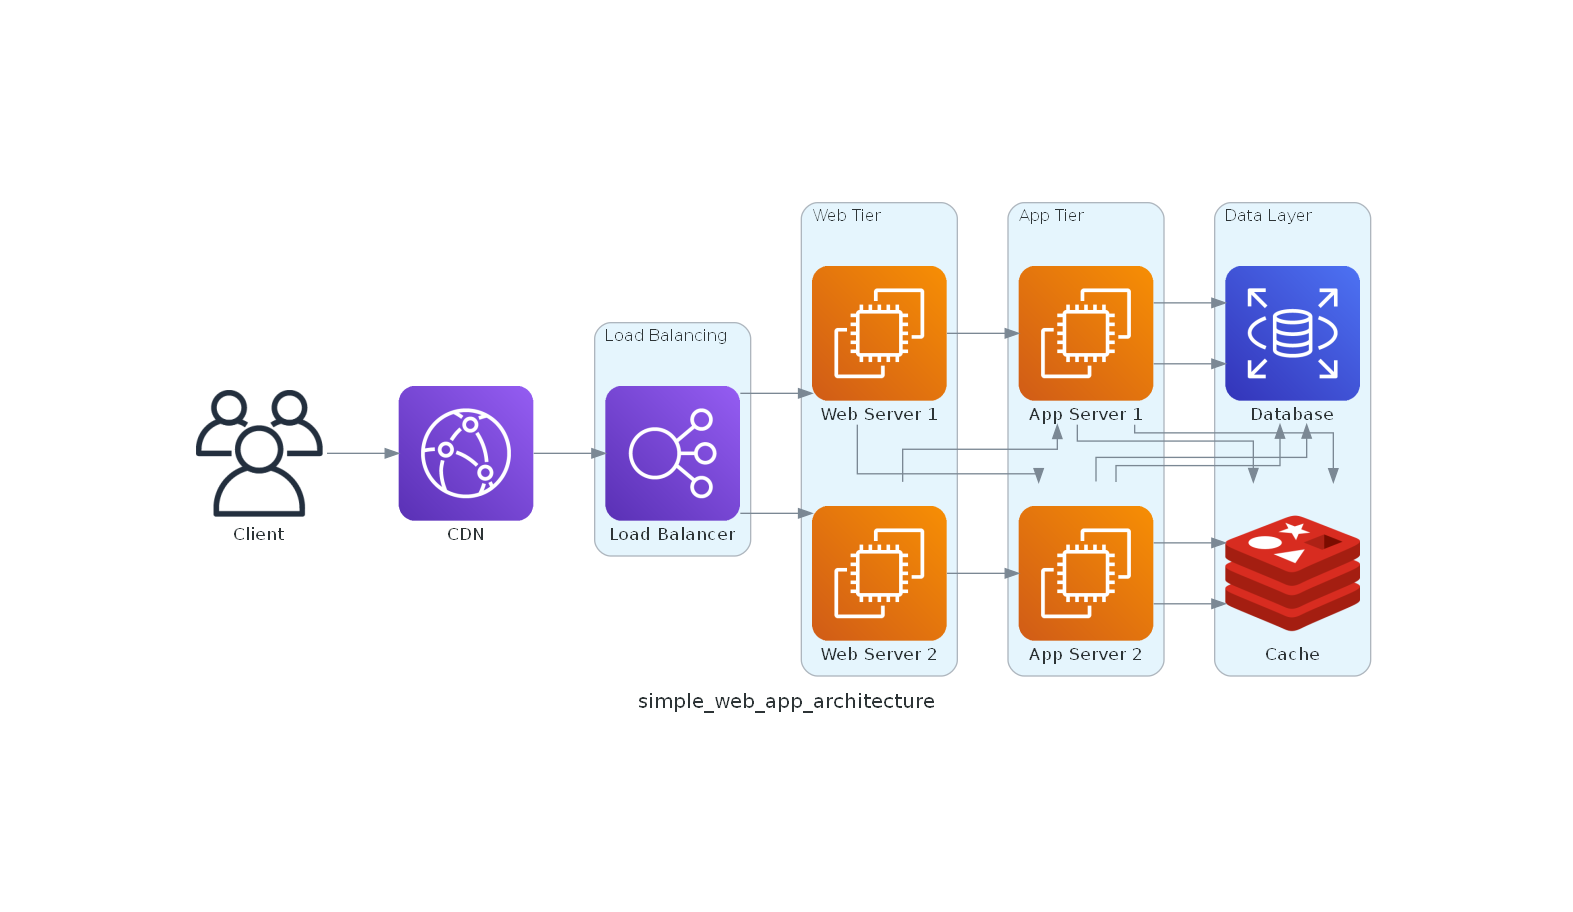

In [2]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import ELB
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import CloudFront
from diagrams.onprem.client import Users
from diagrams.onprem.inmemory import Redis
from IPython.display import Image

# Generate diagram and save to file
with Diagram("simple_web_app_architecture", filename="simple_web_app_architecture", show=False, outformat="png"):

    user = Users("Client")
    cdn = CloudFront("CDN")

    with Cluster("Load Balancing"):
        lb = ELB("Load Balancer")

    with Cluster("Web Tier"):
        web_servers = [EC2("Web Server 1"), EC2("Web Server 2")]

    with Cluster("App Tier"):
        app_servers = [EC2("App Server 1"), EC2("App Server 2")]

    with Cluster("Data Layer"):
        db = RDS("Database")
        cache = Redis("Cache")

    # Connections (element-wise)
    user >> cdn >> lb
    for web in web_servers:
        lb >> web
        for app in app_servers:
            web >> app
            app >> db
            app >> cache


# Display the image inside the notebook
Image("simple_web_app_architecture.png")


In [3]:
#Scalability & Load Balancing

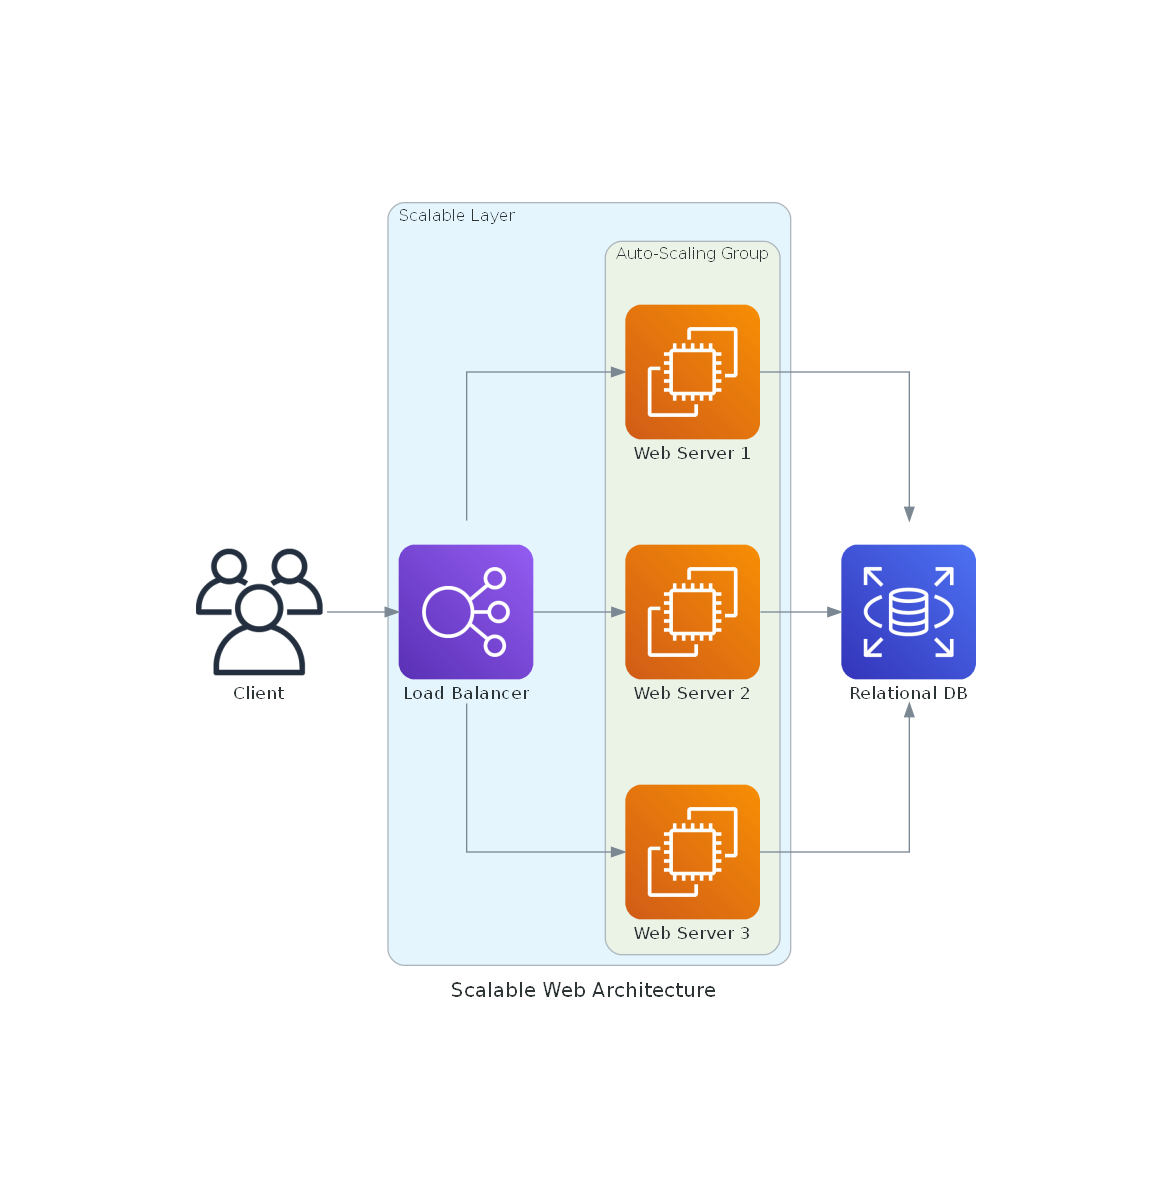

In [4]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2AutoScaling, EC2
from diagrams.aws.network import ELB
from diagrams.aws.database import RDS
from diagrams.onprem.client import Users
from IPython.display import Image

# Generate and save scalable architecture diagram
with Diagram("Scalable Web Architecture", filename="scalable_web_architecture", show=False, outformat="png"):

    user = Users("Client")

    with Cluster("Scalable Layer"):
        lb = ELB("Load Balancer")

        with Cluster("Auto-Scaling Group"):
            web_servers = [EC2("Web Server 1"), EC2("Web Server 2"), EC2("Web Server 3")]

    db = RDS("Relational DB")

    # Connections
    user >> lb
    lb >> web_servers
    for web in web_servers:
        web >> db

Image("scalable_web_architecture.png")


In [5]:
#Database Design & Sharding

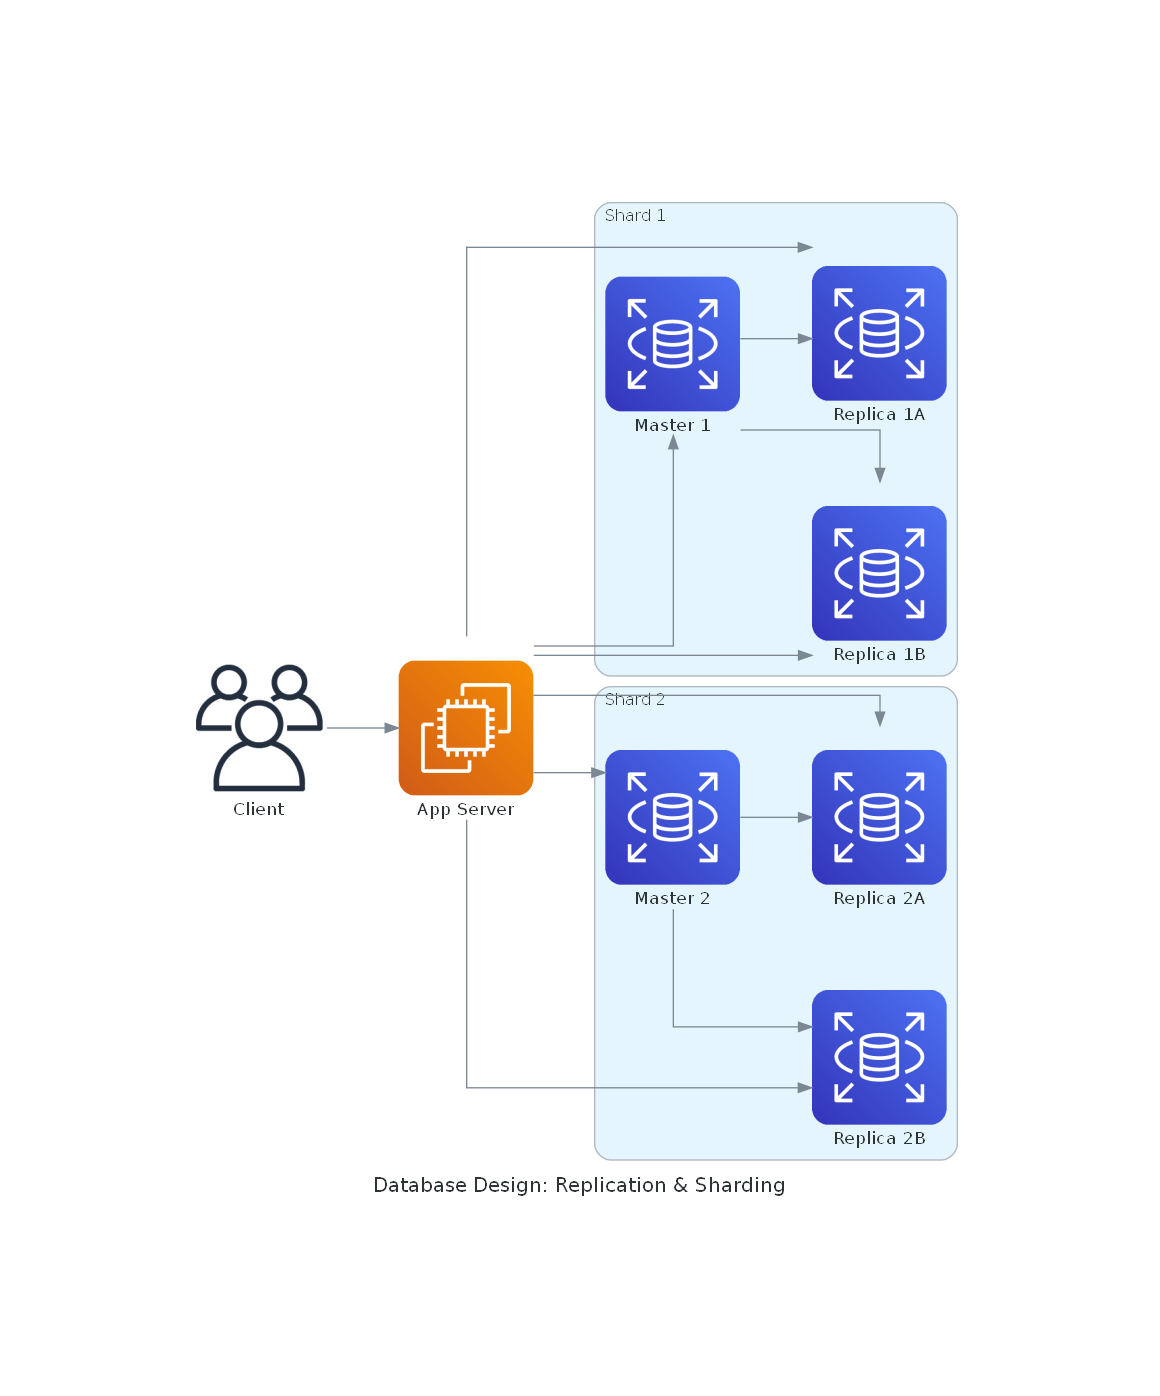

In [6]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.client import Users
from IPython.display import Image

with Diagram("Database Design: Replication & Sharding", filename="db_sharding_replication", show=False, outformat="png"):

    user = Users("Client")
    app_server = EC2("App Server")

    user >> app_server

    with Cluster("Shard 1"):
        master1 = RDS("Master 1")
        replicas1 = [RDS("Replica 1A"), RDS("Replica 1B")]

    with Cluster("Shard 2"):
        master2 = RDS("Master 2")
        replicas2 = [RDS("Replica 2A"), RDS("Replica 2B")]

    # Application server sends writes to masters
    app_server >> master1
    app_server >> master2

    # Application server sends reads to replicas
    for r in replicas1 + replicas2:
        app_server >> r

    # Replication links (visual only)
    master1 >> replicas1
    master2 >> replicas2

Image("db_sharding_replication.png")


In [7]:
#Caching Strategies

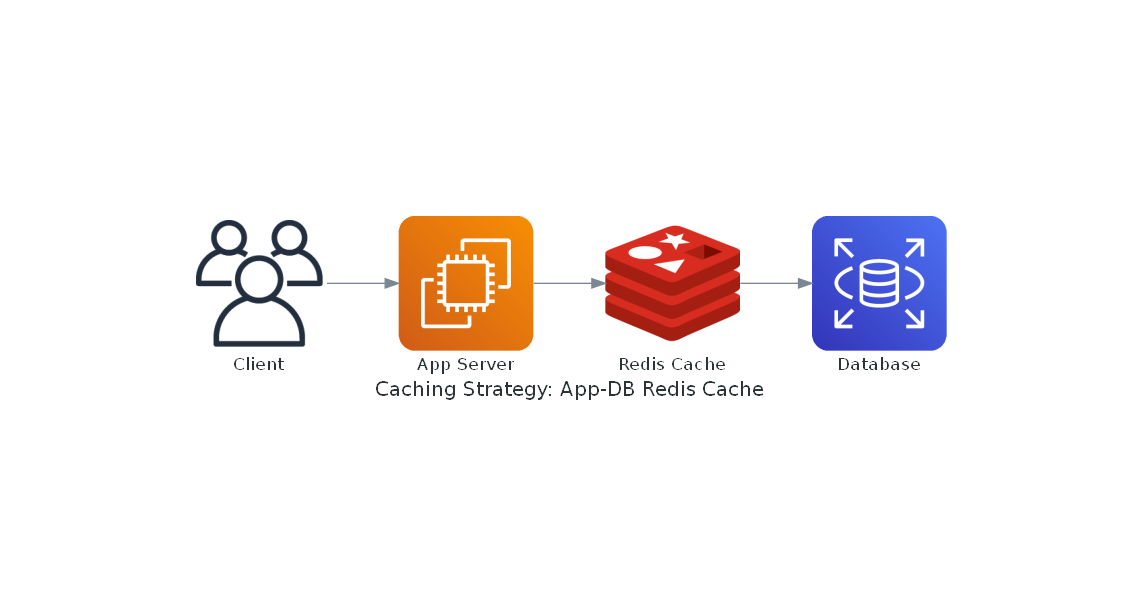

In [8]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.client import Users
from IPython.display import Image

with Diagram("Caching Strategy: App-DB Redis Cache", filename="caching_strategy", show=False, outformat="png"):

    user = Users("Client")
    app = EC2("App Server")

    cache = Redis("Redis Cache")
    db = RDS("Database")

    user >> app
    app >> cache
    cache >> db  # On cache miss
Image("caching_strategy.png")


In [9]:
# Asynchronous Processing

# Offload time-consuming or non-critical tasks

# Make systems faster and more responsive

# Handle spikes in traffic gracefully

# Improve scalability and resilience



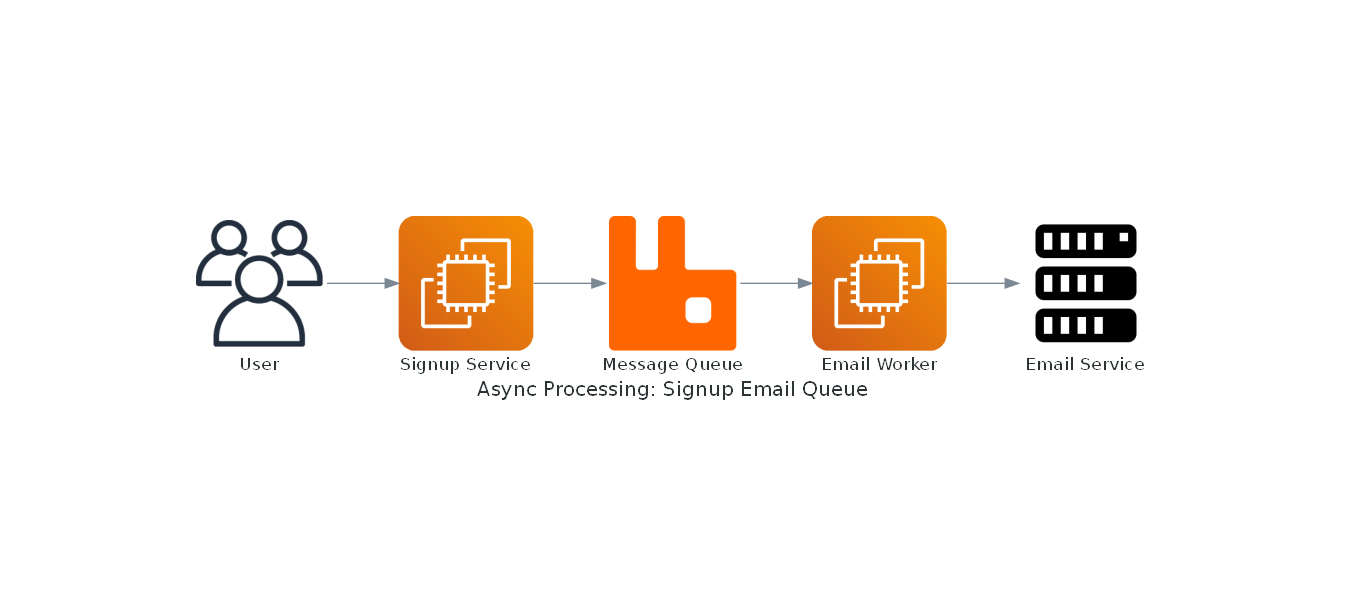

In [10]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.onprem.client import Users
from diagrams.onprem.queue import RabbitMQ
from diagrams.onprem.compute import Server  # generic for email service
from IPython.display import Image

with Diagram("Async Processing: Signup Email Queue", filename="async_processing_queue", show=False, outformat="png"):

    user = Users("User")
    app = EC2("Signup Service")
    queue = RabbitMQ("Message Queue")
    worker = EC2("Email Worker")
    email_service = Server("Email Service")  # generic node

    # Flow: User -> App -> Queue -> Worker -> Email Service
    user >> app >> queue
    queue >> worker >> email_service
Image("async_processing_queue.png")



In [11]:
#Rate Limiting & API Gateways

# Protect backend services from overload or abuse

# Prevent denial-of-service (DoS) attacks

# Ensure fair usage among clients

# Manage quotas (per user/app/IP)

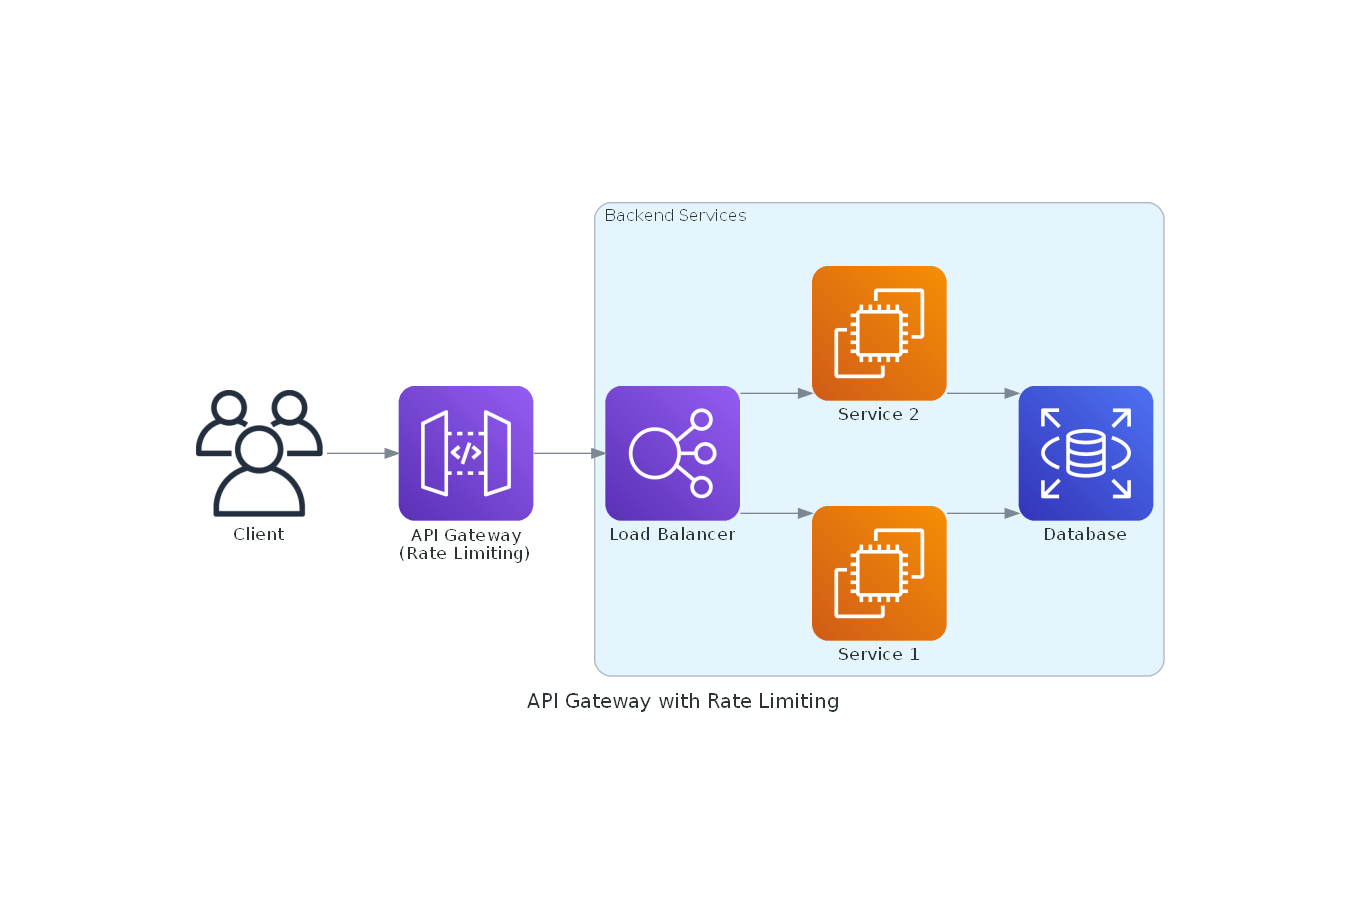

In [12]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import APIGateway, ELB
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.onprem.client import Users
from IPython.display import Image

with Diagram("API Gateway with Rate Limiting", filename="api_gateway_rate_limiting", show=False, outformat="png"):

    user = Users("Client")

    api_gateway = APIGateway("API Gateway\n(Rate Limiting)")

    with Cluster("Backend Services"):
        lb = ELB("Load Balancer")
        service1 = EC2("Service 1")
        service2 = EC2("Service 2")
        db = RDS("Database")


    user >> api_gateway >> lb
    lb >> service1
    lb >> service2
    service1 >> db
    service2 >> db

Image("api_gateway_rate_limiting.png")
